In [1]:
#%pip install strawberryfields --upgrade
import numpy as np
import strawberryfields as sf
from strawberryfields.ops import *
import matplotlib.pyplot as plt
from strawberryfields import RemoteEngine
import time


In [2]:
startmyBSTime = time.time()

boson_sampling = sf.Program(4) 

with boson_sampling.context as q:
    # prepare the input fock states
    Fock(1) | q[0]
    Fock(1) | q[1]
    Fock(1) | q[2]
    Vac     | q[3]
    
    # rotation gates
    Rgate(0.5719)  | q[0]
    Rgate(-1.9782) | q[1]
    Rgate(2.0603)  | q[2]
    Rgate(0.0644)  | q[3]

    # beamsplitter array
    BSgate(0.7804, 0.8578)  | (q[0], q[1])
    BSgate(0.06406, 0.5165) | (q[2], q[3])
    BSgate(0.473, 0.1176)   | (q[1], q[2])
    BSgate(0.563, 0.1517)   | (q[0], q[1])
    BSgate(0.1323, 0.9946)  | (q[2], q[3])
    BSgate(0.311, 0.3231)   | (q[1], q[2])
    BSgate(0.4348, 0.0798)  | (q[0], q[1])
    BSgate(0.4368, 0.6157)  | (q[2], q[3])
    
eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 7})
#eng = sf.RemoteEngine("X8", backend_options={"cutoff_dim": 7})

# We can now execute the program with the engine:
results = eng.run(boson_sampling, shots=400000)

# extract the joint Fock probabilities
probs = results.state.all_fock_probs()
#probs1 = results.state

#boson_sampling.compile(compiler="fock").print()
#print(probs1)
endmyBSTime = time.time()
myBSTime = endmyBSTime - startmyBSTime
print("The execution time for Samplers is :", myBSTime)

The execution time for Samplers is : 26.972990036010742


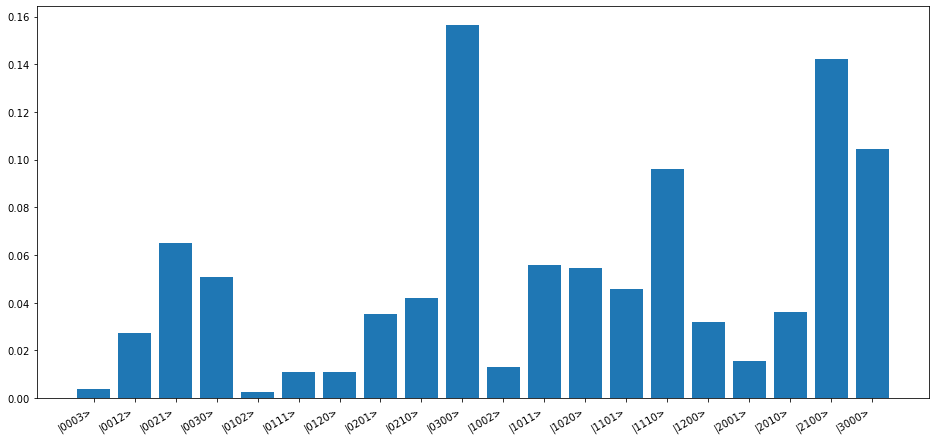

In [3]:
arrayOfProbs = []
myModes = []
myModes2 = []

#find the all probs that not 0
for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            for l in range(0,4):
                if probs[i, j, k, l] != 0:
                    arrayOfProbs.append(probs[i, j, k, l])
                    myModes.append("|" + str(i) +  str(j) +  str(k) +  str(l) + ">")
                    #print(ket1[-1] + ":" , probs1[i, j, k, l])
                    myModes2.append(str(i) + str(j) + str(k) + str(l))

fig = plt.figure(figsize=(16,8))                    
plt.bar(myModes, arrayOfProbs)
fig.autofmt_xdate()
plt.show()

In [4]:
startmyVonNuemannTime = time.time()

#Von-Nuemann Algorithm
code = ''
modes = myModes2
for k in range(len(modes)):
    for i in range(len(modes)):
        #if i != (len(modes)-1):
            #print('S1: ', (modes[k]))
            #print('S2: ', (modes[i+1]))
        for j in range(len(modes[k])):
            if i == (len(modes)-1):
                break
            if (int(modes[k][j]) == 0) & (int(modes[i+1][j]) == 0):
                if j == 3:
                    code = code + ("/")
                    #print('code is: ', code)
                    break
            elif (int(modes[k][j]) == 0) & (int(modes[i+1][j]) != 0):
                code = code + '1'
                if j == 3:
                    code = code + ("/")
                    #print('code is: ', code)
                    break
            elif (int(modes[k][j]) != 0) & (int(modes[i+1][j]) == 0):
                code = code + '0'
                if j == 3:
                    code = code + ("/")
                    #print('code is: ', code)
                    break
            elif (int(modes[k][j]) != 0) & (int(modes[i+1][j]) != 0):
                if j == 3:
                    code = code + ("/")
                    #print('code is: ', code)
                    break
#print(code)

endmyVonNuemannTime = time.time()
myVonNuemannTime = endmyVonNuemannTime - startmyVonNuemannTime
print("The time of execution of Von-Nuemann is :", myVonNuemannTime)
print("Total execution time is :", myBSTime + myVonNuemannTime)


The time of execution of Von-Nuemann is : 0.005001068115234375
Total execution time is : 26.977991104125977


In [5]:
#Because we have shown the states that do not generate random numbers with / in the algorithm, we can separate them.
cleanCode = code.split("/")
#print(cleanCode)

#We count their number.
res = {}
for i in cleanCode:
    res[i] = cleanCode.count(i)
#print(res)

#We remove the states without numbers.
del res['']
#print(res)


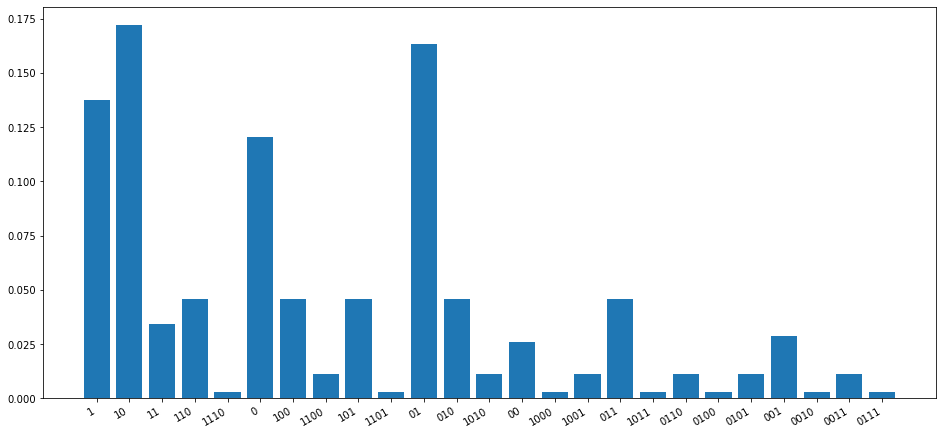

In [6]:
randomNumbers = list(res.keys())
countOfRandomNumbers = list(res.values())
probabilities = countOfRandomNumbers

#We find the probability of any random number.
sumv = 0
for e in range(len(countOfRandomNumbers)):
    sumv = sumv + countOfRandomNumbers[e]

for e in range(len(countOfRandomNumbers)):
    probabilities[e] = countOfRandomNumbers[e]/sumv
    
    
fig = plt.figure(figsize=(16, 8))
plt.bar(range(len(res)), probabilities, tick_label=randomNumbers)
fig.autofmt_xdate()
plt.show()
